In [1]:
# === IMPORTE ===
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
import importlib
import os
import sys

# Aktuelles Verzeichnis zum Python-Pfad hinzufügen
current_dir = os.path.dirname(os.path.abspath('__file__'))
if current_dir not in sys.path:
    sys.path.append(current_dir)
    print(f"✅ Aktuelles Verzeichnis zum PYTHONPATH hinzugefügt: {current_dir}")

# Prüfen, ob alle externen Module vorhanden sind
required_modules = ['ollama_server', 'model_manager', 'benchmark_core', 'visualization', 'model_benchmark_utils']
missing_modules = []

for module in required_modules:
    try:
        importlib.import_module(module)
    except ImportError:
        missing_modules.append(module)

if missing_modules:
    print(f"\n❌ Fehlende Module: {', '.join(missing_modules)}")
    print("Stellen Sie sicher, dass alle benötigten Python-Module im selben Verzeichnis wie dieses Notebook vorhanden sind.")
    # Falls Module fehlen, informiere den Benutzer, aber breche nicht ab
else:
    print("✅ Alle benötigten Module sind vorhanden.")

# Import der Funktionen aus externen Modulen
from ollama_server import check_ollama_server, start_ollama_server
from model_manager import check_model_exists, load_model
from benchmark_core import benchmark_model, run_benchmark
from visualization import visualize_results
from model_benchmark_utils import run_benchmark_test

# Optional: Neuladen der Module, um sicherzustellen, dass die aktuellsten Versionen verwendet werden
importlib.reload(importlib.import_module('ollama_server'))
importlib.reload(importlib.import_module('model_manager'))
importlib.reload(importlib.import_module('benchmark_core'))
importlib.reload(importlib.import_module('visualization'))
importlib.reload(importlib.import_module('model_benchmark_utils'))

✅ Aktuelles Verzeichnis zum PYTHONPATH hinzugefügt: c:\Users\marcn\Desktop\DeepLearning
✅ Alle benötigten Module sind vorhanden.


<module 'model_benchmark_utils' from 'c:\\Users\\marcn\\Desktop\\DeepLearning\\model_benchmark_utils.py'>

# LLM Benchmark-Framework

Dieses Notebook ermöglicht den Vergleich beliebiger Sprachmodelle, die über Ollama zugänglich sind. Sie können damit verschiedene Modelle in Bezug auf Geschwindigkeit, Performance und Antwortqualität für benutzerdefinierte Aufgaben vergleichen.

In [2]:
# === BENCHMARK-KONFIGURATION ===
# Ollama API-URL
OLLAMA_API_URL = "http://localhost:11434/api"

# Zu vergleichende Modelle (zwei oder mehr Modelle angeben)
MODELS = [
    "deepseek-r1:1.5b",  # DeepSeek R1 mit 1,5 Mrd. Parametern
    "llama3.2"        # Llama 3.2 mit 8 Mrd. Parametern
]

# Weitere Modellvorschläge:
# - "phi3:3.8b" - Microsoft Phi-3 (kleines, effizientes Modell) - 3,8 Mrd. Parameter
# - "mistral:7b" - Mistral 7B (gute Balance zwischen Größe und Leistung) - 7 Mrd. Parameter
# - "gemma:7b" - Google Gemma 7B (effizientes Open-Source-Modell) - 7 Mrd. Parameter
# - "codellama:7b" - Code Llama 7B (spezialisiert auf Code-Generierung) - 7 Mrd. Parameter
# - "llama3:8b" - Meta Llama 3 8B (größeres Basis-Modell) - 8 Mrd. Parameter
# - "qwen2:7b" - Qwen2 7B (mehrsprachiges Modell mit guter Deutsch-Unterstützung) - 7 Mrd. Parameter
# - "neural-chat:7b" - Neural Chat 7B (optimiert für Konversationen) - 7 Mrd. Parameter
# - "wizardcoder:7b" - WizardCoder 7B (gut für Programmieraufgaben) - 7 Mrd. Parameter

# Aufgaben für den Benchmark (beliebig erweiterbar)
BENCHMARK_TASKS = [
    {
        "name": "Textgenerierung",
        "prompt": "Schreibe einen kurzen Absatz über KI.",
        "max_tokens": 30,
    },
    {
        "name": "Code-Generierung",
        "prompt": "Schreibe eine einfache Python-Funktion, die prüft, ob eine Zahl gerade ist.",
        "max_tokens": 30,
    },
    {
        "name": "Fakten-Wissen",
        "prompt": "Was ist der Unterschied zwischen ML und AI? Kurze Antwort.",
        "max_tokens": 30,
    }
]

# Benchmark-Parameter
REQUEST_TIMEOUT = 120  # Timeout für Modellantworten (Sekunden)
RETRY_TIMEOUT = 300    # Timeout für zweiten Versuch (Sekunden)
TEMPERATURE = 0.0      # Sampling-Temperatur für die Modelle 

## Durchführung des Benchmarks

Starten des Benchmark-Tests und Anzeige der Ergebnisse.

🚀 Starte Benchmark-Test für deepseek-r1:1.5b, llama3.2...

✅ Modell deepseek-r1:1.5b ist bereit.
⚠️ Modell llama3.2 nicht gefunden. Lade...
Lade Modell llama3.2...
Status: success manifest digest
🧪 Aufgabe: Textgenerierung
  🤖 deepseek-r1:1.5b...
    ✓ 558 Tokens in 67.02s
  🤖 llama3.2...
    ✓ 158 Tokens in 28.19s

🧪 Aufgabe: Code-Generierung
  🤖 deepseek-r1:1.5b...
    ✓ 319 Tokens in 29.79s
  🤖 llama3.2...
    ✓ 171 Tokens in 36.64s

🧪 Aufgabe: Fakten-Wissen
  🤖 deepseek-r1:1.5b...
    ✓ 852 Tokens in 88.94s
  🤖 llama3.2...
    ✓ 119 Tokens in 37.30s


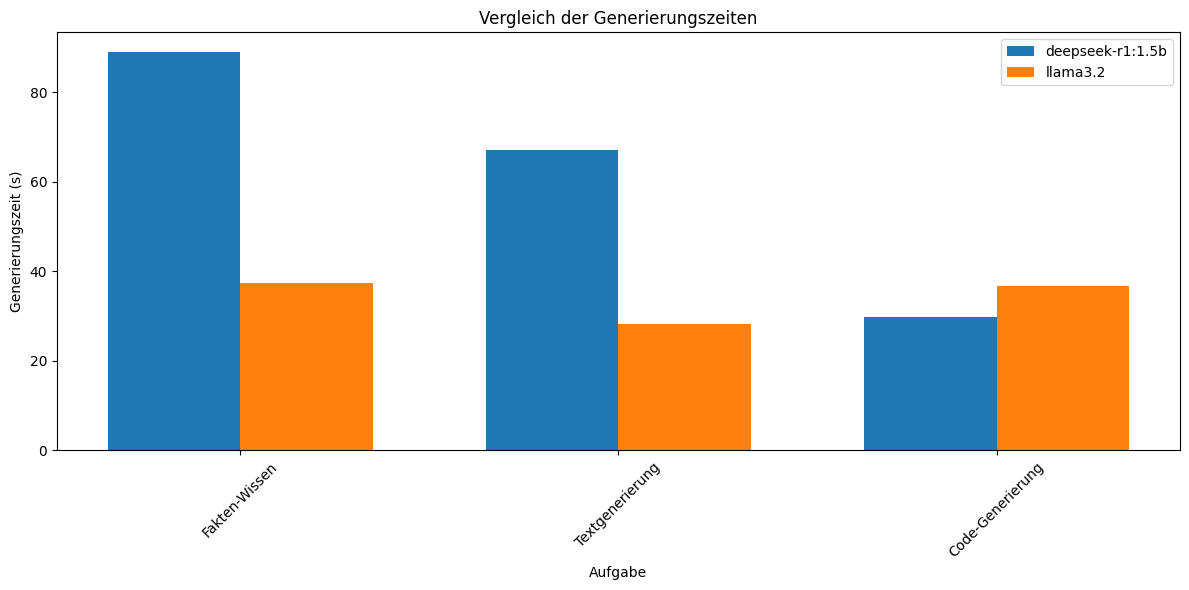

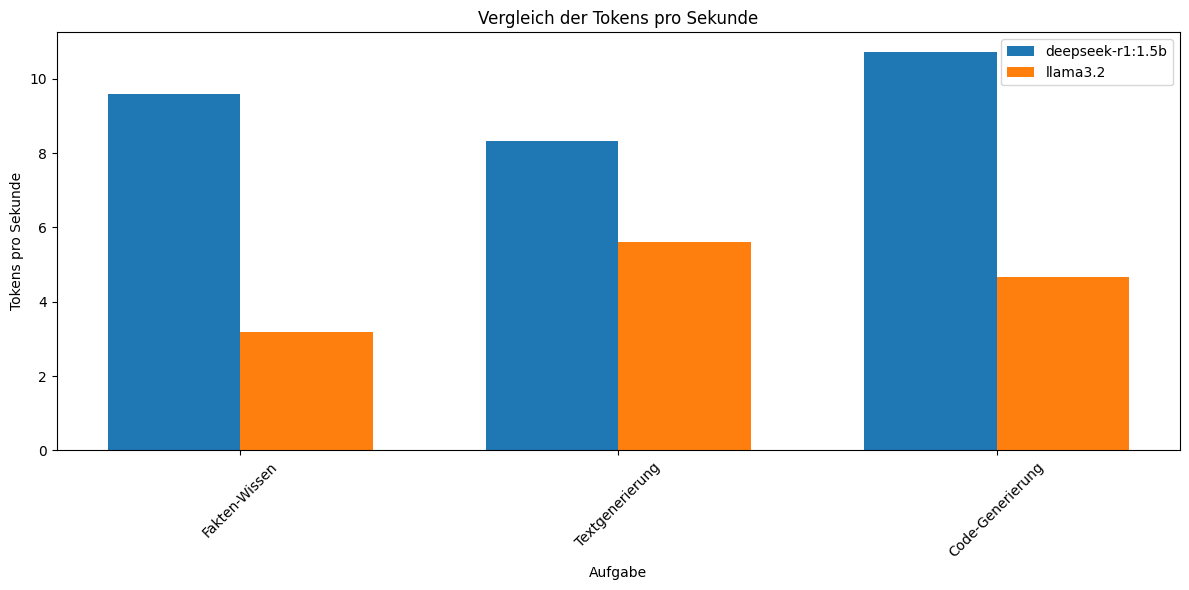


📊 Zusammenfassung der Performance-Metriken:


,Modell,Generierungszeit (s),Tokens generiert,Tokens pro Sekunde
0,deepseek-r1:1.5b,61.914809,576.333333,9.538452
1,llama3.2,34.040688,149.333333,4.487806



📝 Qualitative Bewertung der Antworten:

🔍 Aufgabe: Textgenerierung
Prompt: Schreibe einen kurzen Absatz über KI.

🤖 deepseek-r1:1.5b Antwort:
<think>
Okay, ich muss den Absatz über KI schreiben, der kurz ist. First, verstehe ich was KI ist? KI standiert für Künstliche Intelligenz, also die machine learningbasierte Simulation von Logikprozessen. Der bessere Begriff ist Informatik, da die Wissenschaft umsetzt.

Ich muss clausurative und schlieensitive Darstellung geben. Also, erinnere ich mich an die Einführung der KI, wie sie in der medizinischen Industrie eingesetzt werden. Das bedeutet, KI helping doctors and nurses, providing precise medical information.

Dann füge ich die Anwendungszwecke hinzu: personalisierte Lernprozesssimulationen für p SECONDARISTISCHE UNGERADEN, künstliche Intelligenzen in der medizinischen Repräsentation, digitaler medizinischer Proze ment Simulation und model-based Simulation. Daumen die Anwendungsmöglichkeiten zu den Differentiationen von medizinischen Aus

In [3]:
# Ausführen des Benchmarks 
# Im Notebook nur Aufruf der externen Funktion - keine Definition

# Benchmark durchführen mit den konfigurierten Parametern
benchmark_results = run_benchmark_test(
    api_url=OLLAMA_API_URL,
    models=MODELS,
    tasks=BENCHMARK_TASKS,
    temperature=TEMPERATURE
)